In [105]:
%matplotlib inline
import numpy as np
import scipy.stats as sci_stats
import matplotlib.pyplot as plt
import pandas as pd

In [106]:
mu = 0.0
sigma = 1.0
x = np.random.normal(mu, sigma, 1000)

In [107]:
def gen_non_normal(mu, sigma, n, nn_factor):
    x = np.random.normal(mu, sigma, n)
    y = np.random.uniform(-sigma, sigma, n)
    z = x + nn_factor*y
    return z

In [108]:
def plot_norm_histo(x, mu, sigma):
    count, bins, ignored = plt.hist(x, 100, normed=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * 
         np.exp(- (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')
    plt.show()

In [149]:
mu = 0.0  # mean
sigma = 1.0  # standard deviation
num_samples = 100000  # number of samples in the experiments

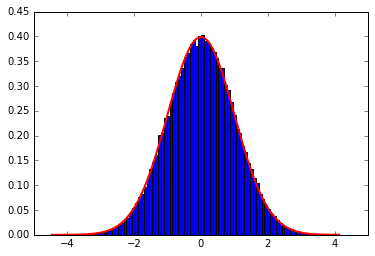

In [150]:
x1 = gen_non_normal(mu, sigma, num_samples, 0.0)
plot_norm_histo(x1, mu, sigma)

In [151]:
ar = sci_stats.anderson(x1, 'norm')
print('Anderson-Darling statistic:', ar.statistic)
pd.DataFrame({'critical value': ar.critical_values, 'significance': ar.significance_level})

Anderson-Darling statistic: 0.287138597807


,critical value,significance
0,0.576,15.0
1,0.656,10.0
2,0.787,5.0
3,0.918,2.5
4,1.092,1.0


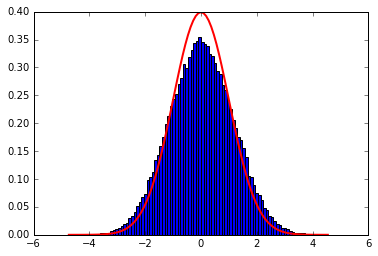

In [153]:
x1 = gen_non_normal(mu, sigma, num_samples, 1.0)
plot_norm_histo(x1, mu, sigma)

In [155]:
ar = sci_stats.anderson(x1, 'norm')
print('Anderson-Darling statistic:', ar.statistic)
pd.DataFrame({'critical value': ar.critical_values, 'significance': ar.significance_level})

Anderson-Darling statistic: 1.90083865827


,critical value,significance
0,0.576,15.0
1,0.656,10.0
2,0.787,5.0
3,0.918,2.5
4,1.092,1.0


In [156]:
for non_norm_factor in np.linspace(0, 2, num=20):
    x1 = gen_non_normal(mu, sigma, num_samples, non_norm_factor)
    print(non_norm_factor, sci_stats.anderson(x1, 'norm').statistic)

0.0 0.622973843841
0.105263157895 1.06799582153
0.210526315789 0.444910873644
0.315789473684 0.495364644477
0.421052631579 0.423372203266
0.526315789474 0.168912444409
0.631578947368 0.507528656497
0.736842105263 0.251811917857
0.842105263158 0.430675971715
0.947368421053 0.377794922693


1.05263157895 2.38649890339
1.15789473684 4.7483695609
1.26315789474 6.17796759536
1.36842105263 9.24730877875
1.47368421053 13.8320881614
1.57894736842 21.9609415889
1.68421052632 27.1229070172
1.78947368421 34.1802094746
1.89473684211 50.7969812987
2.0 55.422380521
